In [1]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

%matplotlib inline

In [2]:
# Global variables to define ranges between segments

NEVER_ORGANIC_MAX = 0.1
MID = 0.5
SUPER_ORGANIC_MIN = 0.9

In [3]:
# Read in the produce dataset
organic = pd.read_csv('produce_dataset.csv')

In [4]:
# Drop the column of index from the previous table (no longer valid indices)
organic.drop('Unnamed: 0', axis =1, inplace=True)

In [5]:
# Dataset is ordered by user_id
organic.head(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits
5,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,0,24,fresh fruits
6,2,1,2168274,2,11,NaN,27966,Organic Raspberries,11,0,123,packaged vegetables fruits
7,2,1,2168274,2,11,NaN,13176,Bag of Organic Bananas,12,0,24,fresh fruits
8,2,1,2168274,2,11,NaN,45066,Honeycrisp Apple,13,0,24,fresh fruits
9,2,2,1501582,5,10,10.0,16797,Strawberries,1,0,24,fresh fruits


In [6]:
# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1


In [29]:
unumord = organic.groupby('user_id')['order_number'].nunique()
unumord

user_id
1          2
2         15
3         12
4          1
5          5
          ..
206205     3
206206    11
206207    16
206208    45
206209    11
Name: order_number, Length: 194331, dtype: int64

In [7]:
# Group the rows by user_id and add the previously initialized total_produce_purchased column (each row is 1)
# This returns a series with user_id, total_produce_purchased
user_total = organic.groupby('user_id')['total_produce_purchased'].sum()
user_total

user_id
1           5
2          43
3          38
4           2
5          23
         ... 
206205     14
206206     34
206207     50
206208    197
206209     20
Name: total_produce_purchased, Length: 194331, dtype: int64

In [8]:
# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


In [9]:
# Group the rows by user_id and add the previously initialized organic? column (1 for organic, 0 for non-organic)
# This returns a series with user_id, organic?

user_organic = organic.groupby('user_id')['organic?'].sum()
user_organic

user_id
1           3
2          21
3          23
4           2
5          15
         ... 
206205      7
206206     27
206207     47
206208    154
206209      9
Name: organic?, Length: 194331, dtype: int32

In [10]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
user_df = pd.concat([user_total, user_organic], axis=1).reset_index()
user_df

,user_id,total_produce_purchased,organic?
0,1,5,3
1,2,43,21
2,3,38,23
3,4,2,2
4,5,23,15
...,...,...,...
194326,206205,14,7
194327,206206,34,27
194328,206207,50,47
194329,206208,197,154


In [32]:
user_df = pd.merge(user_df, unumord, on='user_id')
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,order_number
0,1,5,3,0.600000,Moderate Organic,2
1,2,43,21,0.488372,Organic Taster,15
2,3,38,23,0.605263,Moderate Organic,12
3,4,2,2,1.000000,Super Organic,1
4,5,23,15,0.652174,Moderate Organic,5
...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3
194327,206206,34,27,0.794118,Moderate Organic,11
194328,206207,50,47,0.940000,Super Organic,16
194329,206208,197,154,0.781726,Moderate Organic,45


In [33]:
# Rename the organic? column to 'organic_produce_purchased'
user_df.rename(columns = {'organic?':'organic_produce_purchased', 'order_number':'number_of_orders'}, inplace = True) 
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,number_of_orders
0,1,5,3,0.600000,Moderate Organic,2
1,2,43,21,0.488372,Organic Taster,15
2,3,38,23,0.605263,Moderate Organic,12
3,4,2,2,1.000000,Super Organic,1
4,5,23,15,0.652174,Moderate Organic,5
...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3
194327,206206,34,27,0.794118,Moderate Organic,11
194328,206207,50,47,0.940000,Super Organic,16
194329,206208,197,154,0.781726,Moderate Organic,45


In [34]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased
user_df['organic_%'] = user_df['organic_produce_purchased']/user_df['total_produce_purchased']

In [35]:
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,number_of_orders
0,1,5,3,0.600000,Moderate Organic,2
1,2,43,21,0.488372,Organic Taster,15
2,3,38,23,0.605263,Moderate Organic,12
3,4,2,2,1.000000,Super Organic,1
4,5,23,15,0.652174,Moderate Organic,5
...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3
194327,206206,34,27,0.794118,Moderate Organic,11
194328,206207,50,47,0.940000,Super Organic,16
194329,206208,197,154,0.781726,Moderate Organic,45


In [36]:
# Create a new 'segment' column and initialize it with None
user_df['segment'] = np.NaN

# Set up the user segments per the percentage ranges below and assign the values to the 'segment' column
user_df.loc[user_df['organic_%'] < NEVER_ORGANIC_MAX, 'segment'] = 'Never Organic'
user_df.loc[(user_df['organic_%'] >= NEVER_ORGANIC_MAX) & (user_df['organic_%'] < MID), 'segment'] = 'Organic Taster'
user_df.loc[(user_df['organic_%'] >= MID) & (user_df['organic_%'] < SUPER_ORGANIC_MIN), 'segment'] = 'Moderate Organic'
user_df.loc[user_df['organic_%'] >= SUPER_ORGANIC_MIN, 'segment'] = 'Super Organic'

In [37]:
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,number_of_orders
0,1,5,3,0.600000,Moderate Organic,2
1,2,43,21,0.488372,Organic Taster,15
2,3,38,23,0.605263,Moderate Organic,12
3,4,2,2,1.000000,Super Organic,1
4,5,23,15,0.652174,Moderate Organic,5
...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3
194327,206206,34,27,0.794118,Moderate Organic,11
194328,206207,50,47,0.940000,Super Organic,16
194329,206208,197,154,0.781726,Moderate Organic,45


In [38]:
# Filter the user dataframe by removing all users with total produce purchased <10
df_filtered = user_df[user_df['total_produce_purchased'] > 9] 
df_filtered.head(30)

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,number_of_orders
1,2,43,21,0.488372,Organic Taster,15
2,3,38,23,0.605263,Moderate Organic,12
4,5,23,15,0.652174,Moderate Organic,5
6,7,58,35,0.603448,Moderate Organic,20
7,8,40,20,0.500000,Moderate Organic,4
9,10,72,27,0.375000,Organic Taster,5
10,11,11,2,0.181818,Organic Taster,7
11,12,24,11,0.458333,Organic Taster,5
12,13,17,5,0.294118,Organic Taster,9
13,14,33,5,0.151515,Organic Taster,14


In [39]:
a = df_filtered.groupby('segment').sum()
a

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,number_of_orders
segment,,,,,
Moderate Organic,7106728280,5398847,3706362,46745.811139,1206072
Never Organic,1486091000,527700,24006,551.328998,188169
Organic Taster,6025665679,3316590,1109260,18222.342023,859853
Super Organic,728087708,427346,400502,6717.899282,117531


In [18]:
a.drop(['user_id', 'organic_%'], axis=1)

,total_produce_purchased,organic_produce_purchased
segment,,
Moderate Organic,5398847,3706362
Never Organic,527700,24006
Organic Taster,3316590,1109260
Super Organic,427346,400502


In [19]:
b = df_filtered.groupby('segment').count()
b

,user_id,total_produce_purchased,organic_produce_purchased,organic_%
segment,,,,
Moderate Organic,69074,69074,69074,69074
Never Organic,14367,14367,14367,14367
Organic Taster,58326,58326,58326,58326
Super Organic,7102,7102,7102,7102


In [20]:
b.drop(['total_produce_purchased', 'organic_produce_purchased', 'organic_%'], axis=1)

,user_id
segment,
Moderate Organic,69074
Never Organic,14367
Organic Taster,58326
Super Organic,7102


In [21]:
dfm = pd.merge(a, b, on='segment')

In [22]:
dfm

,user_id_x,total_produce_purchased_x,organic_produce_purchased_x,organic_%_x,user_id_y,total_produce_purchased_y,organic_produce_purchased_y,organic_%_y
segment,,,,,,,,
Moderate Organic,7106728280,5398847,3706362,46745.811139,69074,69074,69074,69074
Never Organic,1486091000,527700,24006,551.328998,14367,14367,14367,14367
Organic Taster,6025665679,3316590,1109260,18222.342023,58326,58326,58326,58326
Super Organic,728087708,427346,400502,6717.899282,7102,7102,7102,7102


In [23]:
dfm.reindex(['Never Organic', 'Organic Taster', 'Moderate Organic', 'Super Organic'])

,user_id_x,total_produce_purchased_x,organic_produce_purchased_x,organic_%_x,user_id_y,total_produce_purchased_y,organic_produce_purchased_y,organic_%_y
segment,,,,,,,,
Never Organic,1486091000,527700,24006,551.328998,14367,14367,14367,14367
Organic Taster,6025665679,3316590,1109260,18222.342023,58326,58326,58326,58326
Moderate Organic,7106728280,5398847,3706362,46745.811139,69074,69074,69074,69074
Super Organic,728087708,427346,400502,6717.899282,7102,7102,7102,7102


<BarContainer object of 4 artists>

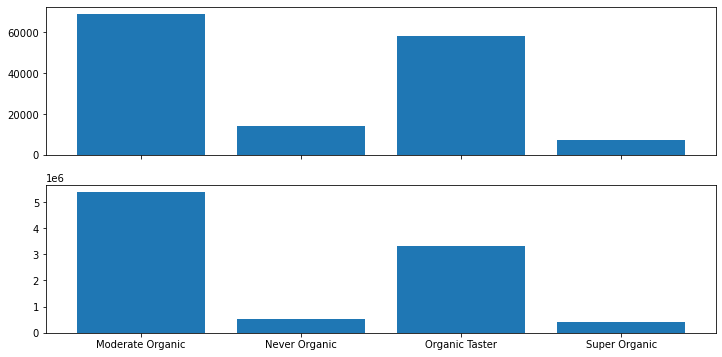

In [28]:
fig, (ax1) = plt.subplots(2,1,figsize = (12,6), sharex=True)

ax1[0].bar(dfm.index,dfm['user_id_y'])
ax1[1].bar(dfm.index,dfm['total_produce_purchased_x'])


TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

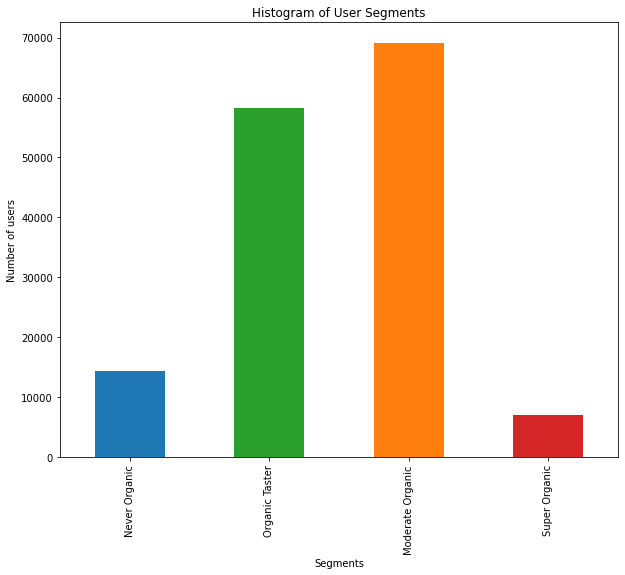

In [25]:
# Plot the count of each segment

fig, ax = plt.subplots(1,1,figsize=(10,8))

df_filtered['segment'].value_counts().reindex(['Never Organic', 'Organic Taster', 'Moderate Organic', 'Super Organic']).plot(kind="bar", color = ['#1f77b4','#2ca02c','#ff7f0e','#d62728'])

plt.title('Histogram of User Segments')
plt.xlabel('Segments')
plt.ylabel('Number of users')
ax.get_yaxis().set_major_formatter(lambda x, loc: "{:,}".format(int(x)))
plt.xticks(rotation='horizontal')

In [ ]:
# Plot the histogram of percentage organic from 0-1

fig, ax = plt.subplots(1,1,figsize=(12,10))

N, bins, patches = plt.hist(df_filtered['organic_%']*100, bins = 100)

# Assign the colors for the bins
for i in range(0,len(patches)):
    if i < 10:
        patches[i].set_facecolor('#1f77b4')
    if i >= 10 and i < 50:
        patches[i].set_facecolor('#2ca02c')
    if i >= 50 and i < 90:
        patches[i].set_facecolor('#ff7f0e')
    if i >= 90:
        patches[i].set_facecolor('#d62728')  
    
    
ax.get_yaxis().set_major_formatter(lambda x, loc: "{:,}".format(int(x)))    
    
plt.title('Histogram of the Organic Percentage of User Produce Orders')
plt.xlabel('Percentage (%)')
plt.ylabel('Number of users')
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))



# Create a corresponding legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['#1f77b4','#2ca02c','#ff7f0e','#d62728']]
labels= ["Never Organic", "Organic Taster", "Moderate Organic", "Super Organic"]
plt.legend(handles, labels)

pass